# Housing Market Analysis

In [24]:
import pandas as pd
# Replace 'data.csv' with the path to your CSV file
file_path = 'Annual_Macroeconomic_Factors.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
print(df.head())



         Date  House_Price_Index  Stock_Price_Index  Consumer_Price_Index  \
0  1975-01-01            61.0900           67.14653              65.30488   
1  1976-01-01            65.5250           79.96264              69.05653   
2  1977-01-01            73.4350           78.82540              73.54636   
3  1978-01-01            83.7450           78.84679              79.15866   
4  1979-01-01            95.1325           85.63207              88.06755   

   Population  Unemployment_Rate  Real_GDP  Mortgage_Rate  \
0     0.98599            8.46667  5648.462        9.04712   
1     0.95022            7.71667  5952.809        8.86585   
2     1.00577            7.06667  6228.076        8.84519   
3     1.05957            6.06667  6572.819        9.64173   
4     1.10358            5.83333  6780.924       11.20365   

   Real_Disposable_Income  
0                 19908.0  
1                 20346.0  
2                 20780.0  
3                 21497.0  
4                 21672.0  


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select all numeric columns for normalization
numeric_columns = df.select_dtypes(include=['number']).columns

# Fit and transform the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Print the normalized DataFrame
print(df)


# Get descriptive statistics of numeric columns to assess their scale
descriptive_stats = df.describe()

print(descriptive_stats)


Date                      0
House_Price_Index         0
Stock_Price_Index         0
Consumer_Price_Index      0
Population                0
Unemployment_Rate         0
Real_GDP                  0
Mortgage_Rate             0
Real_Disposable_Income    0
dtype: int64
          Date  House_Price_Index  Stock_Price_Index  Consumer_Price_Index  \
0   1975-01-01           0.000000           0.000000              0.000000   
1   1976-01-01           0.009596           0.005856              0.014237   
2   1977-01-01           0.026711           0.005336              0.031276   
3   1978-01-01           0.049019           0.005346              0.052574   
4   1979-01-01           0.073658           0.008446              0.086383   
5   1980-01-01           0.089961           0.015011              0.131666   
6   1981-01-01           0.099850           0.018974              0.170886   
7   1982-01-01           0.102495           0.015562              0.196559   
8   1983-01-01           0.119334

# Multiple Linear Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Assume the target variable is named 'target' and features are other columns
X = df.drop(['House_Price_Index', 'Date'], axis=1) 
y = df['House_Price_Index']


# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Coefficients: [ 0.14472248 -0.5596745   0.08288662  0.00743177  0.47040084  0.19833561
  1.02741074]
Intercept: -0.15434404933636858
Mean Squared Error (MSE): 0.0030536321060990793
R-squared (R2) Score: 0.9196681353244619


                            OLS Regression Results                            
Dep. Variable:      House_Price_Index   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     270.3
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           5.36e-31
Time:                        14:41:04   Log-Likelihood:                 88.734
No. Observations:                  47   AIC:                            -161.5
Df Residuals:                      39   BIC:                            -146.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

C:\Users\kingm\AppData\Local\Temp\ipykernel_852\1138431162.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


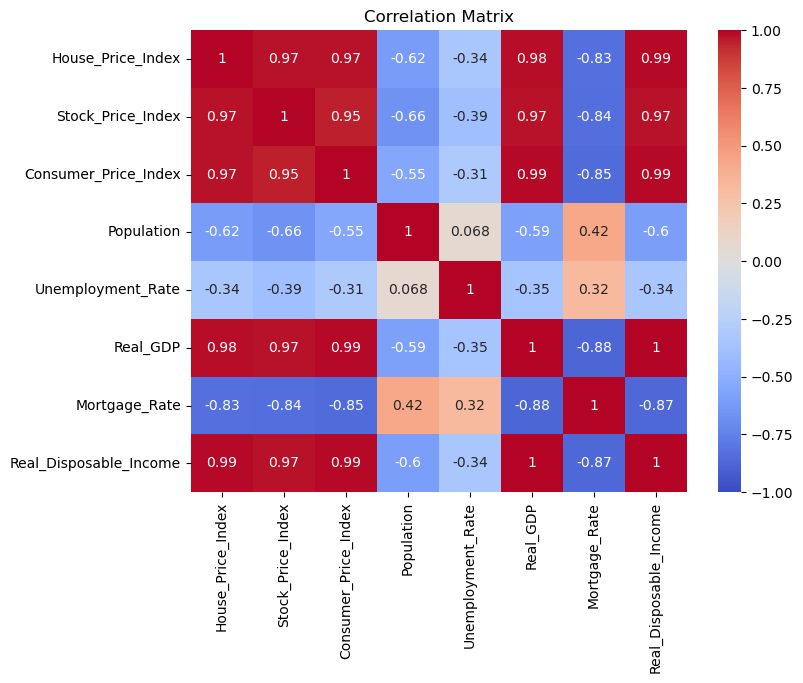

In [39]:
import statsmodels.api as sm
import seaborn as sns



X_with_const = sm.add_constant(X)  # Add a constant (intercept) to the model

# Fit OLS model
model = sm.OLS(y, X_with_const).fit()

# Display summary statistics including p-values
print(model.summary())

# Step 2: Visualize correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [43]:
# New modeling dropping out unemp. rate and population

# Assume the target variable is named 'target' and features are other columns
X = df.drop(['House_Price_Index', 'Date', 'Population'], axis=1) 
y = df['House_Price_Index']


# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Coefficients: [ 0.07605933 -0.41968692 -0.00717841  0.34854158  0.1627814   1.01949982]
Intercept: -0.0711732341152137
Mean Squared Error (MSE): 0.002483641877429286
R-squared (R2) Score: 0.934662861710927
